In [1]:
%matplotlib notebook
import matplotlib.pyplot as pl
import sys
from numpy import *
from sys import argv, exit
from os import path, mkdir
from scipy import interpolate
import shutil
import pylab as pl


# The space-time distribution of the initial strings

In [2]:
plotLineWidth = 0.5
plotMarkerSize = 10

# change to your path
data = loadtxt('../../external_packages/3dMCGlauber/strings_event_AuAu200.dat') 
colors = pl.cm.rainbow(linspace(0, 1, len(data)))
fig = pl.figure()
ax = pl.axes([0.15, 0.13, 0.80, 0.8])
for i in range(len(data[:, 0])):
    eta = linspace(data[i, 7], data[i, 8], 100)
    tau = (data[i, 3]*cosh(eta - data[i, 4])
           + sqrt((data[i, 3]*cosh(eta - data[i, 4]))**2.
                  - (data[i, 3]**2. - data[i, 2]**2.)))
    #plotlinestyle, plotMarker, plotColor, plotshadowColor = getPlotElements(i)
    ax.plot(eta, tau, color='b',
            linestyle = '-', linewidth = plotLineWidth, alpha = 0.5)
    ax.plot(data[i, 7], tau[0], color='k', marker='o', markersize=5, alpha=0.25)
    ax.plot(data[i, 8], tau[-1], color='k', marker='o', markersize=5, alpha=0.25)
pl.xlim([-6, 6])
pl.xticks(linspace(-6, 6, 7))
pl.ylim([0.0, 5.0])
pl.xlabel(r'$\eta_s$', fontsize=25)
pl.ylabel(r'$\tau$ (fm/c)', fontsize=25)
pl.title(r'0-5% Au+Au@200GeV', fontsize=15)

OSError: ../../external_packages/3dMCGlauber/strings_event_AuAu200.dat not found.

In [ ]:
# change to your path
data = loadtxt('../../external_packages/3dMCGlauber/strings_event_AuAu19p6.dat') 

fig = pl.figure()
ax = pl.axes([0.15, 0.13, 0.80, 0.8])
for i in range(len(data[:, 0])):
    eta = linspace(data[i, 7], data[i, 8], 100)
    tau = (data[i, 3]*cosh(eta - data[i, 4])
           + sqrt((data[i, 3]*cosh(eta - data[i, 4]))**2.
                  - (data[i, 3]**2. - data[i, 2]**2.)))
    #plotlinestyle, plotMarker, plotColor, plotshadowColor = getPlotElements(i)
    ax.plot(eta, tau, color = 'b',
            linestyle = '-', linewidth = plotLineWidth, alpha = 0.5)
    ax.plot(data[i, 7], tau[0], color='k', marker='o', markersize=5, alpha=0.25)
    ax.plot(data[i, 8], tau[-1], color='k', marker='o', markersize=5, alpha=0.25)
pl.xlim([-6, 6])
pl.xticks(linspace(-6, 6, 7))
pl.ylim([0.0, 5.0])
pl.xlabel(r'$\eta_s$', fontsize=25)
pl.ylabel(r'$\tau$ (fm/c)', fontsize=25)
pl.title(r'0-5% Au+Au@19.6GeV', fontsize=15)


In [ ]:
# change to your path
data = loadtxt('../../external_packages/3dMCGlauber/strings_event_dAu19p6.dat') 

fig = pl.figure()
ax = pl.axes([0.15, 0.13, 0.80, 0.8])
for i in range(len(data[:, 0])):
    eta = linspace(data[i, 7], data[i, 8], 100)
    tau = (data[i, 3]*cosh(eta - data[i, 4])
           + sqrt((data[i, 3]*cosh(eta - data[i, 4]))**2.
                  - (data[i, 3]**2. - data[i, 2]**2.)))
    #plotlinestyle, plotMarker, plotColor, plotshadowColor = getPlotElements(i)
    ax.plot(eta, tau, color = 'b',
            linestyle = '-', linewidth = plotLineWidth, alpha = 0.5)
    ax.plot(data[i, 7], tau[0], color='k', marker='o', markersize=5, alpha=0.25)
    ax.plot(data[i, 8], tau[-1], color='k', marker='o', markersize=5, alpha=0.25)
pl.xlim([-6, 6])
pl.xticks(linspace(-6, 6, 7))
pl.ylim([0.0, 5.0])
pl.xlabel(r'$\eta_s$', fontsize=25)
pl.ylabel(r'$\tau$ (fm/c)', fontsize=25)
pl.title(r'0-5% d+Au@19.6GeV', fontsize=15)
pl.show()

# Run X-SCAPE

In [ ]:
import os
import numpy as np

def get_dEdetas(path):
    e=0
    pz=0
    AllE=[]
    Alletas=[]
    AllEn=[]
    Alletasn=[]
    HBARC = 0.19733

    neta = 500
    eta = np.linspace(-8, 8, neta)
    deta = eta[1] - eta[0]

    sigma_eta = 0.5
    norm_eta = 1./(np.sqrt(2.*np.pi)*sigma_eta)
    etaDis = 10.*sigma_eta

    dEdetas = np.zeros([neta])
    dNbdetas = np.zeros([neta])
    dNbdy = np.zeros([neta])
    Ncount = 0
    file_path = os.listdir(path)
    for kk in range(len(file_path)):
        try:
            stringList = loadtxt("{}/{}".format(path, file_path[kk]))
        except OSError as e:
            print("wrong events ", kk)
            continue
        else:
            Ncount =Ncount +1
            #stringList = np.loadtxt(file_i)
            if stringList.ndim == 1:
                stringList = stringList.reshape(1, len(stringList))
            for istring in range(len(stringList)):
                # calcualte energy distribution
                mass = stringList[istring, 0]
                frac_l = stringList[istring, 15]
                frac_r = stringList[istring, 16]
                y_l = stringList[istring, 13]
                y_r = stringList[istring, 14]
                eta_l = stringList[istring, 11]
                eta_r = stringList[istring, 12]
                y_l_i = stringList[istring, 17]
                y_r_i = stringList[istring, 18]

                Estring = mass*(  np.cosh(y_l_i) + np.cosh(y_r_i)
                                - np.cosh(y_l) - np.cosh(y_r))
                EremL = mass*np.cosh(y_l)
                EremR = mass*np.cosh(y_r)

                # energy density
                f1_ed = np.zeros([neta])
                idx = ((eta < eta_r) & (eta > eta_l))       # inside the string
                y_eta = y_l + (y_r - y_l)/(eta_r - eta_l)*(eta - eta_l)
                f1_ed[idx] = np.cosh(y_eta[idx])
                idx = ((eta > eta_r) & (eta - eta_r < etaDis))
                f1_ed[idx] += (np.exp(-(eta[idx] - eta_r)**2./(2.*sigma_eta**2.))
                               *np.cosh(y_r))
                idx = ((eta < eta_l) & (eta_l - eta < etaDis))
                f1_ed[idx] += (np.exp(-(eta[idx] - eta_l)**2./(2.*sigma_eta**2.))
                               *np.cosh(y_l))
                dEdetas += Estring*f1_ed/(sum(f1_ed)*deta)

                f1_ed = np.zeros([neta])
                idx = (abs(eta - eta_r) < etaDis)
                f1_ed[idx] = (np.exp(-(eta[idx] - eta_r)**2./(2.*sigma_eta**2.))
                              *np.cosh(y_r))
                dEdetas += EremR*f1_ed/(sum(f1_ed)*deta)

                f1_ed = np.zeros([neta])
                idx = (abs(eta - eta_l) < etaDis)
                f1_ed[idx] = (np.exp(-(eta[idx] - eta_l)**2./(2.*sigma_eta**2.))
                              *np.cosh(y_l))
                dEdetas += EremL*f1_ed/(sum(f1_ed)*deta)

                # calcualte baryon distribution
                nB_eta_l = stringList[istring, 19]
                nB_eta_r = stringList[istring, 20]
                nB_y_l = stringList[istring, 21]
                nB_y_r = stringList[istring, 22]
                nB_frac_l = stringList[istring, 23]
                nB_frac_r = stringList[istring, 24]

                idx = (abs(eta - nB_eta_l) < etaDis)
                dNbdetas[idx] += (
                                nB_frac_l*np.exp(-(eta[idx] - nB_eta_l)**2./(2.*sigma_eta**2.)))
                idx = (abs(eta - nB_eta_r) < etaDis)
                dNbdetas[idx] += (
                                nB_frac_r*np.exp(-(eta[idx] - nB_eta_r)**2./(2.*sigma_eta**2.)))

                idx = (abs(eta - nB_y_l) < etaDis)
                dNbdy[idx] += (
                                nB_frac_l*np.exp(-(eta[idx] - nB_y_l)**2./(2.*sigma_eta**2.)))
                idx = (abs(eta - nB_y_r) < etaDis)
                dNbdy[idx] += (
                                nB_frac_r*np.exp(-(eta[idx] - nB_y_r)**2./(2.*sigma_eta**2.)))
    nev = Ncount
    print("We have {} effecive events".format(int(nev)))
    dEdetas /= nev
    dNbdetas *= norm_eta
    dNbdetas /= nev
    dNbdy *= norm_eta
    dNbdy /= nev
    output_ed = np.array([eta, dEdetas]).transpose()
    output_nB = np.array([eta, dNbdetas, dNbdy]).transpose()
    return output_ed

def calculate_subtrated_energ(path):
    total_four_mom = array([0, 0, 0, 0])
    Ncount = 0
    file_path = os.listdir(path)
    for kk in range(len(file_path)):
        try:
            data = loadtxt("{}/{}".format(path, file_path[kk]))
        except OSError as e:
            print("wrong events ", kk)
            continue
        else:
            Ncount = Ncount + 1
            if data.ndim == 1:
                data = data.reshape(1, len(data))
            # string energy and Pz
            StringE = data[:, 0]*(cosh(data[:, 17]) - cosh(data[:, 13])
                                  + cosh(data[:, 18]) - cosh(data[:, 14]))
            StringPz = data[:, 0]*(sinh(data[:, 17]) - sinh(data[:, 13])
                                  + sinh(data[:, 18]) - sinh(data[:, 14]))
            # Remnant energy and Pz
            RemnantE = data[:, 0]*(data[:, 15]*cosh(data[:, 13])
                                  + data[:, 16]*cosh(data[:, 14]))
            RemnantPz = data[:, 0]*(data[:, 15]*sinh(data[:, 13])
                                  + data[:, 16]*sinh(data[:, 14]))
            RemnantPx = data[:, -2]
            RemnantPy = data[:, -1]
            four_mom = array([sum(StringE) + sum(RemnantE), sum(StringPz) + sum(RemnantPz),
                                    sum(RemnantPx), sum(RemnantPy)])
            total_four_mom = total_four_mom + four_mom
    return total_four_mom/Ncount
# change to your path
check_sub_No_sub = calculate_subtrated_energ("../String_files_sub_0")
print("The four mmomentum without subtraction is ", check_sub_No_sub)
#check_sub__80_100 = calculate_subtrated_energ("/home/wenbin/Downloads/Wenbin_working/Work/WSU_BNL_work/Summary_school_2023/test/X-SCAPE/build/String_files_80_100")
#print("The four mmomentum subtracted with 80<pTHat< 100 GeV/c is ", check_sub__80_100)
check_sub__800_1000 = calculate_subtrated_energ("../String_files_sub_800")
print("The four mmomentum subtracted with 800<pTHat< 1000 GeV/c is ", check_sub__800_1000)

# change to your path
No_sub = get_dEdetas("../String_files_sub_0")
#Sub_80_100 = get_dEdetas("/home/wenbin/Downloads/Wenbin_working/Work/WSU_BNL_work/Summary_school_2023/test/X-SCAPE/build/String_files_80_100")
Sub_800_1000 = get_dEdetas("../String_files_sub_800")

plotLineWidth = 2
fig = pl.figure()
ax = pl.axes([0.15, 0.13, 0.80, 0.8])
pl.plot(No_sub[:,0], No_sub[:,1]/np.cosh(No_sub[:,0]),'k', 
        linewidth = plotLineWidth,label='No subtracted')
#pl.plot(Sub_80_100[:,0], Sub_80_100[:,1]/np.cosh(Sub_80_100[:,0]), 
#        'b',linewidth = plotLineWidth,label='Subtracted, 80 < pTHat < 100 GeV/c')
pl.plot(Sub_800_1000[:,0], Sub_800_1000[:,1]/np.cosh(Sub_800_1000[:,0]), 
        'g',linewidth = plotLineWidth,label='Subtracted,  800 < pTHat < 1000 GeV/c')
pl.legend( loc='upper left' , fontsize=12)
pl.ylim(0,5.14)
pl.title('p-p @5020 GeV', fontsize=15)# give plot a title
pl.xlabel('$\eta_s$', fontsize=15)# make axis labels
pl.ylabel('$dE/d\eta_s/cosh(\eta_s)$', fontsize=13)
pl.xticks(fontsize=15)
pl.yticks(fontsize=12)



#  hydro evolution

<IPython.core.display.Javascript object>


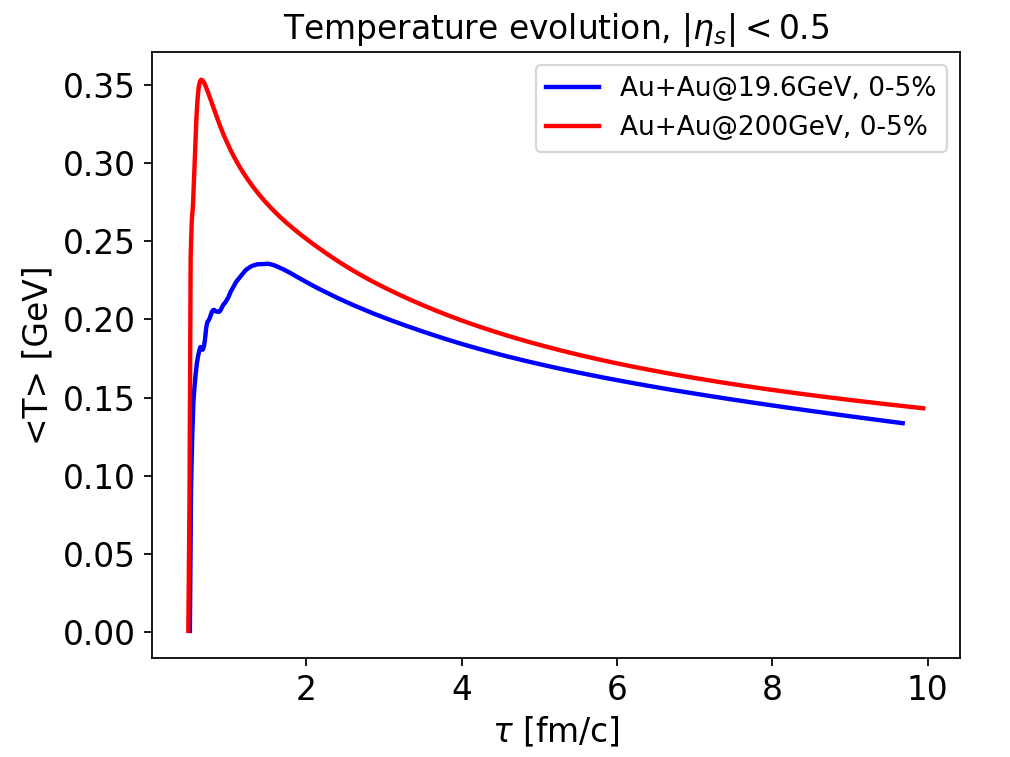

Text(0.5, 1.0, 'Temperature evolution, $|\\eta_s|<0.5$')

In [3]:
#  Temperature evolution
plotLineWidth = 2
fig = pl.figure()
ax = pl.axes([0.15, 0.13, 0.80, 0.8])
data = loadtxt('pre_generated_results/Hydro_evolution/AuAu19p6_05/averaged_phase_diagram_trajectory_eta_-0.5_0.5.dat')
ax.plot(data[:,0], data[:,1], color = 'b',
        linestyle = '-', linewidth = plotLineWidth, alpha = 1,label='Au+Au@19.6GeV, 0-5%')

data = loadtxt('pre_generated_results/Hydro_evolution/AuAu200_05/averaged_phase_diagram_trajectory_eta_-0.5_0.5.dat')
ax.plot(data[:,0], data[:,1], color = 'r',
        linestyle = '-', linewidth = plotLineWidth, alpha = 1,label='Au+Au@200GeV, 0-5%')
pl.legend( loc='upper right' , fontsize=12)
pl.xticks(fontsize=15)
pl.yticks(fontsize=15)
pl.xlabel(r'$\tau$ [fm/c]', fontsize=15)
pl.ylabel(r'<T> [GeV]', fontsize=15)
pl.title(r'Temperature evolution, $|\eta_s|<0.5$', fontsize=15)

<IPython.core.display.Javascript object>


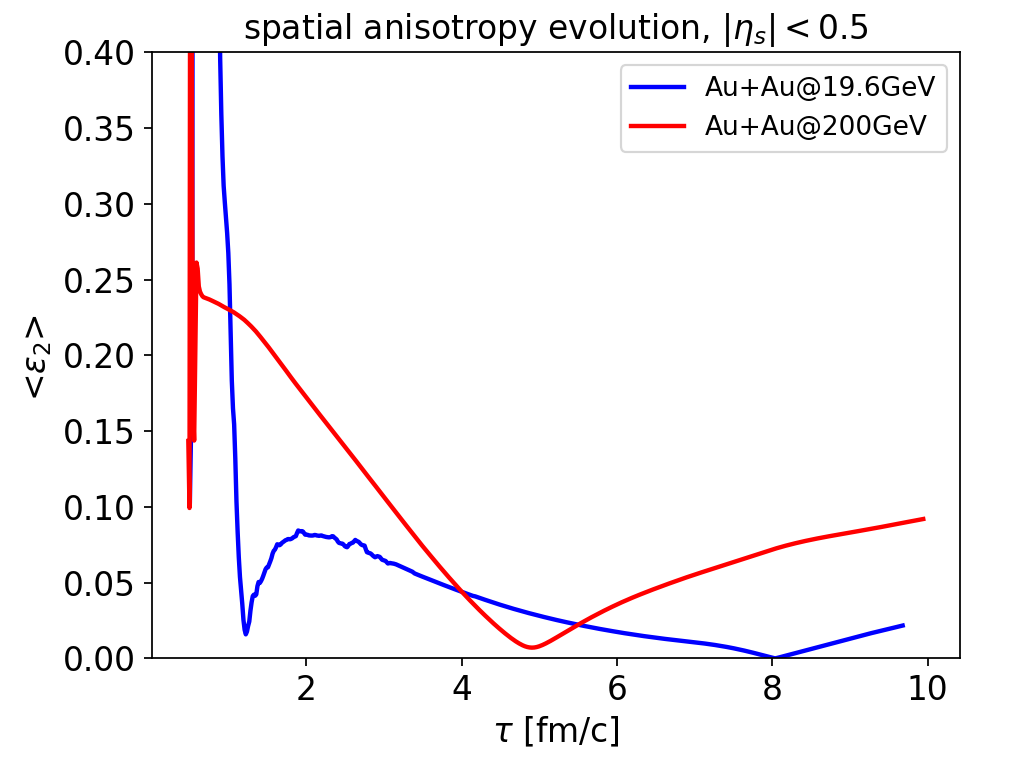

Text(0.5, 1.0, 'spatial anisotropy evolution, $|\\eta_s|<0.5$')

In [4]:
fig = pl.figure()
ax = pl.axes([0.15, 0.13, 0.80, 0.8])
data = loadtxt('pre_generated_results/Hydro_evolution/AuAu19p6_05/eccentricities_evo_eta_-0.5_0.5.dat')
ax.plot(data[:,0], (data[:,11]**2 + data[:,12]**2)**0.5, color = 'b',
        linestyle = '-', linewidth = plotLineWidth, alpha = 1,label='Au+Au@19.6GeV')
data = loadtxt('pre_generated_results/Hydro_evolution/AuAu200_05/eccentricities_evo_eta_-0.5_0.5.dat')
ax.plot(data[:,0], (data[:,11]**2 + data[:,12]**2)**0.5, color = 'r',
        linestyle = '-', linewidth = plotLineWidth, alpha = 1,label='Au+Au@200GeV')
pl.legend( loc='upper right' , fontsize=12)
pl.xticks(fontsize=15)
pl.yticks(fontsize=15)
pl.ylim(0.0,0.4)
pl.xlabel(r'$\tau$ [fm/c]', fontsize=15)
pl.ylabel(r'<$\epsilon_{2}$> ', fontsize=15)
pl.title(r'spatial anisotropy evolution, $|\eta_s|<0.5$', fontsize=15)


<IPython.core.display.Javascript object>


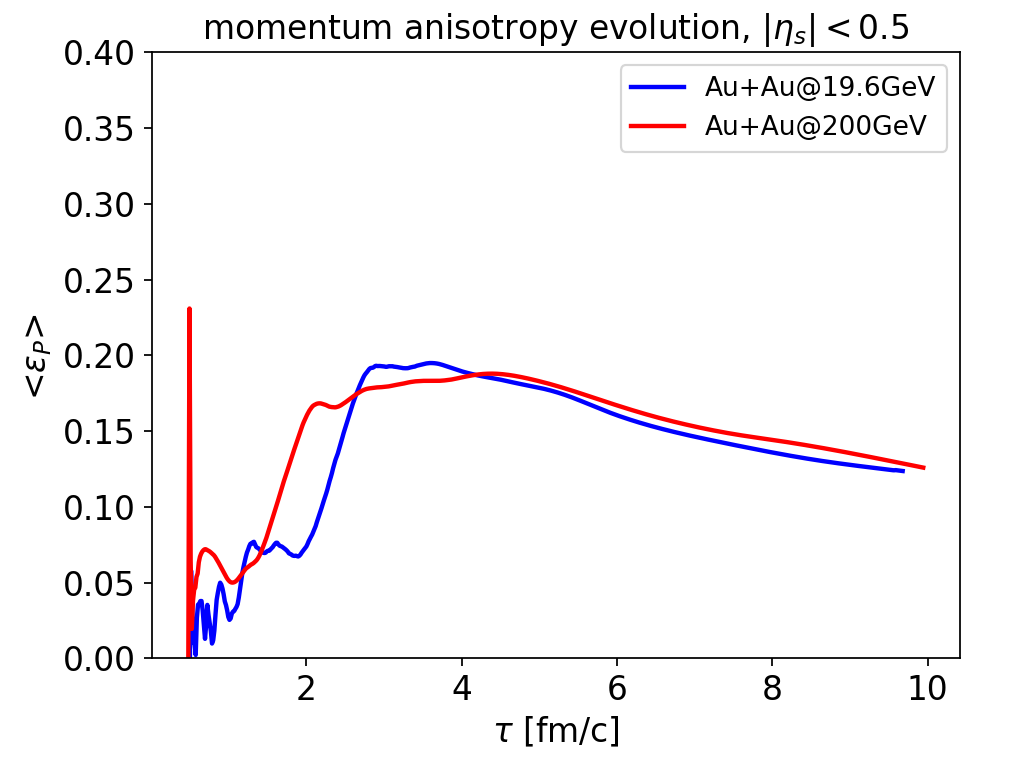

Text(0.5, 1.0, 'momentum anisotropy evolution, $|\\eta_s|<0.5$')

In [5]:
fig = pl.figure()
ax = pl.axes([0.15, 0.13, 0.80, 0.8])
data = loadtxt('pre_generated_results/Hydro_evolution/AuAu19p6_05/momentum_anisotropy_eta_-0.5_0.5.dat')
ax.plot(data[:,0], (data[:,11]**2 + data[:,12]**2)**0.5, color = 'b',
        linestyle = '-', linewidth = plotLineWidth, alpha = 1,label='Au+Au@19.6GeV')
data = loadtxt('pre_generated_results/Hydro_evolution/AuAu200_05/momentum_anisotropy_eta_-0.5_0.5.dat')
ax.plot(data[:,0], (data[:,11]**2 + data[:,12]**2)**0.5, color = 'r',
        linestyle = '-', linewidth = plotLineWidth, alpha = 1,label='Au+Au@200GeV')
pl.legend( loc='upper right' , fontsize=12)
pl.xticks(fontsize=15)
pl.yticks(fontsize=15)
pl.ylim(0.0,0.4)
pl.xlabel(r'$\tau$ [fm/c]', fontsize=15)
pl.ylabel(r'<$\epsilon_{P}$> ', fontsize=15)
pl.title(r'momentum anisotropy evolution, $|\eta_s|<0.5$', fontsize=15)


# X-SCAPE Soft-Hard correlation

<IPython.core.display.Javascript object>


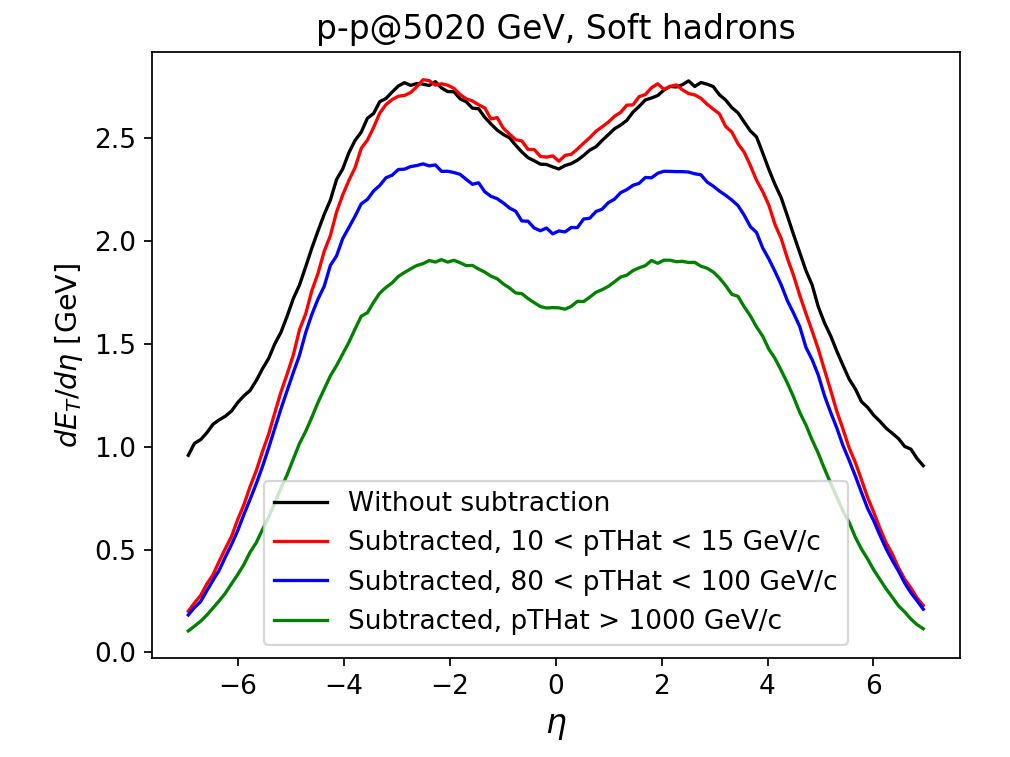

In [6]:
filename = ['dE_deta_0_no_sub', 'dE_deta_0_after_sub_10_15', 'dE_deta_0_after_sub_80_100', 'dE_deta_0_after_sub_above_1000']
plotname = ['Without subtraction', 'Subtracted, 10 < pTHat < 15 GeV/c', 'Subtracted, 80 < pTHat < 100 GeV/c', 
            'Subtracted, pTHat > 1000 GeV/c']
colorname = ['k', 'r', 'b', 'g']
fig = pl.figure()
ax = pl.axes([0.15, 0.13, 0.80, 0.8])
dE_deta_no_sub = loadtxt("pre_generated_results/Soft_Hard_Correlation/{}".format(filename[0]))
pl.plot(dE_deta_no_sub[:,0], dE_deta_no_sub[:,3],'k',label='{}'.format(plotname[0]))
for ii in range(1, len(filename)):
    dE_deta_sub = loadtxt("pre_generated_results/Soft_Hard_Correlation/{}".format(filename[ii]))
    pl.plot(dE_deta_sub[:,0], dE_deta_sub[:,3],'{}'.format(colorname[ii]),
            label='{}'.format(plotname[ii]))
    pl.legend( loc='lower center' , fontsize=12)
    pl.title('p-p@5020 GeV, Soft hadrons', fontsize=15)
    pl.xlabel('$\eta$', fontsize=15)
    pl.ylabel('$dE_T/d\eta$ [GeV]', fontsize=13)
    pl.xticks(fontsize=12)
    pl.yticks(fontsize=12)


# X-SCAPE p-p results

<IPython.core.display.Javascript object>


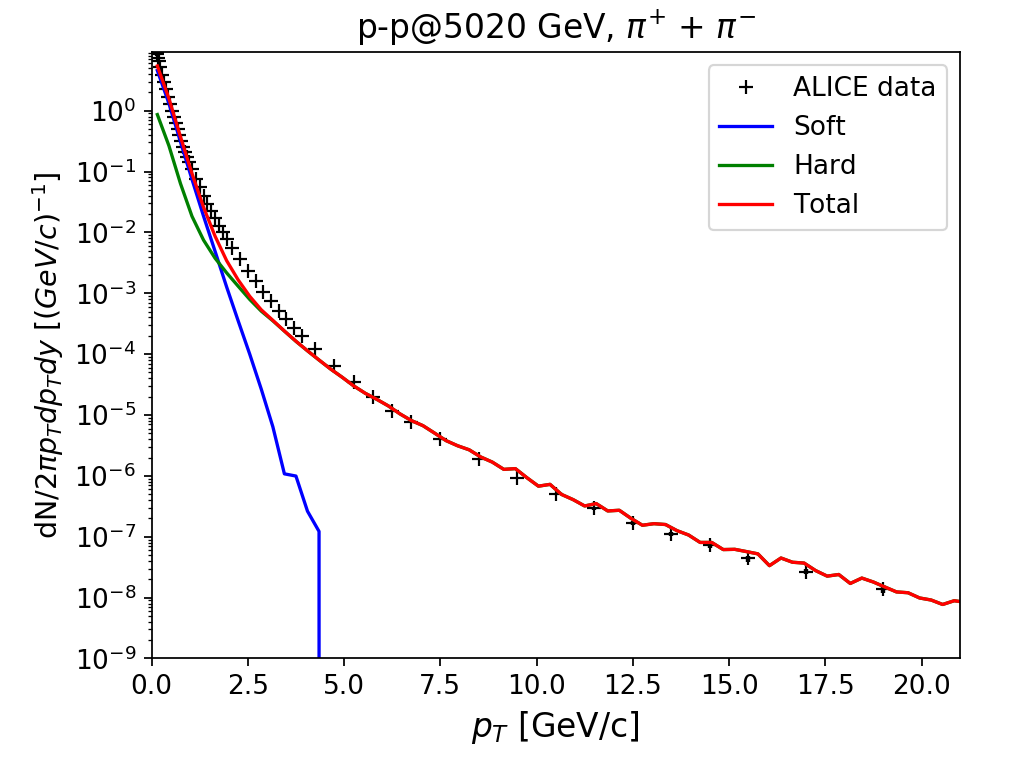

(array([1.e-10, 1.e-09, 1.e-08, 1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03,
        1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
 <a list of 13 Text yticklabel objects>)

In [7]:
import math
fig = pl.figure()
ax = pl.axes([0.15, 0.13, 0.80, 0.8])
pl.yscale('log')

data = loadtxt("pre_generated_results/data/ALICE_spectra/pion_charge_Data")
pl.plot(data[:,0], data[:,3]/2/math.pi/data[:,0],'k+',label='ALICE data')
pl.errorbar(data[:,0],data[:,3]/2/math.pi/data[:,0], data[:,4]/2/math.pi/data[:,0], 0, 
            capsize=0, ls='none', color='k', elinewidth=2)

dN_2pipTdpTdy = loadtxt("pre_generated_results/X-SCAPE-pp-results/dN_2pi_pTdpTdy_pion")
pl.plot(dN_2pipTdpTdy[:,0], dN_2pipTdpTdy[:,2], 'b',label='Soft')
pl.plot(dN_2pipTdpTdy[:,0], dN_2pipTdpTdy[:,3], 'g',label='Hard')
pl.plot(dN_2pipTdpTdy[:,0], dN_2pipTdpTdy[:,1], 'r',label='Total')

pl.legend( loc='upper right' , fontsize=12)
pl.xlim(0,21)
pl.ylim(1e-9,9.14)
pl.title('p-p@5020 GeV, $\pi^{+}$ + $\pi^{-}$', fontsize=15)# give plot a title
pl.xlabel('$p_{T}$ [GeV/c]', fontsize=15)# make axis labels
pl.ylabel('dN/$2\pi p_{T}dp_{T}dy$ [$(GeV/c)^{-1}$]', fontsize=13)
pl.xticks(fontsize=12)
pl.yticks(fontsize=12)


<IPython.core.display.Javascript object>


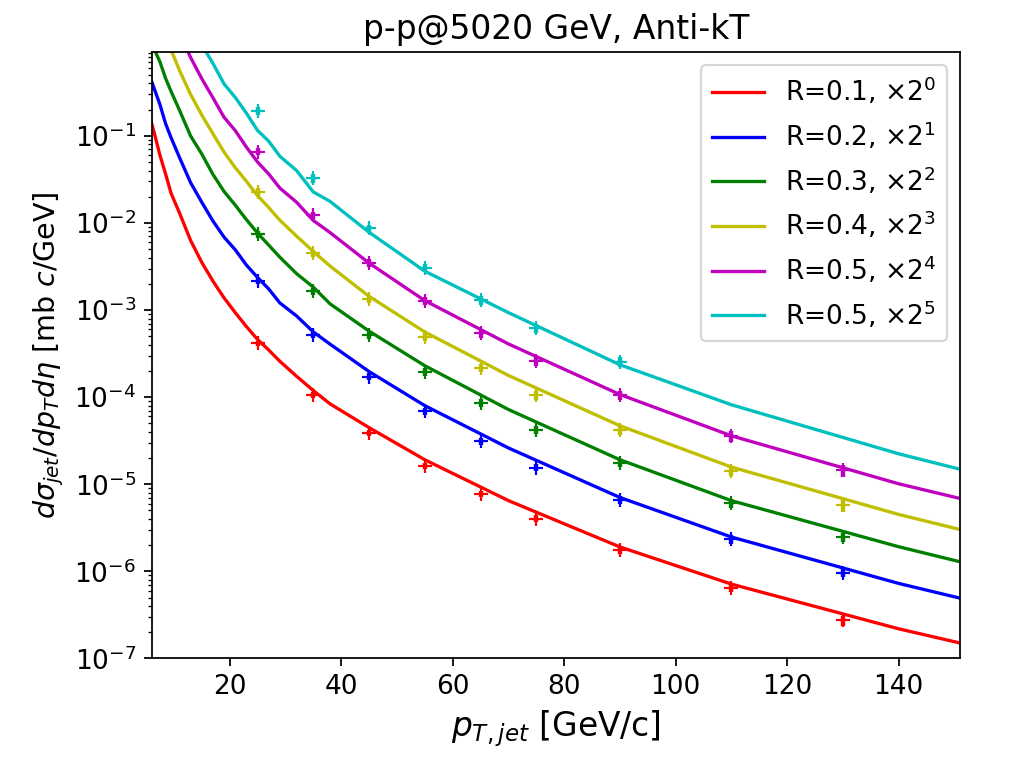

(array([1.e-08, 1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01,
        1.e+00, 1.e+01]), <a list of 10 Text yticklabel objects>)

In [8]:
fig = pl.figure()
ax = pl.axes([0.15, 0.13, 0.80, 0.8])
pl.yscale('log')
R = array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7])
colorname = ['r', 'b', 'g', 'y', 'm', 'c', 'k']
data_name = ['0p1','0p2','0p3','0p4','0p5','0p6']
plotname = ['R=0.1, $\\times 2^{0}$', 'R=0.2, $\\times 2^{1}$', 'R=0.3, $\\times 2^{2}$',
            'R=0.4, $\\times 2^{3}$', 'R=0.5, $\\times 2^{4}$', 'R=0.5, $\\times 2^{5}$']
for ir in range(6):
  data = loadtxt("pre_generated_results/data/ALICE_jet_spactra/R_{}".format(data_name[ir]))
  pl.plot(data[:,0], data[:,3]*2**ir,'{}+'.format(colorname[ir]))
  pl.errorbar(data[:,0],data[:,3]*2**ir, (data[:,6]*data[:,6] + data[:,4]*data[:,4])**0.5*2**ir,
              0, capsize=0, ls='none', color='{}'.format(colorname[ir]), elinewidth=2)
  exec("model = loadtxt('pre_generated_results/X-SCAPE-pp-results/jet_dsigma_dptdy_xscape_R_pp')")
  pl.plot(model[:,0], model[:,ir+1]*2**ir,'{}'.format(colorname[ir]),label='{}'.format(plotname[ir]))
pl.legend( loc='upper right' , fontsize=12)
pl.xlim(6,151)
pl.ylim(0.1e-6,0.914)
pl.title('p-p@5020 GeV, Anti-kT', fontsize=15)# give plot a title
pl.xlabel('$p_{T, jet}$ [GeV/c]', fontsize=15)# make axis labels
pl.ylabel('$d\sigma_{jet}/dp_{T}d\eta$ [mb $c$/GeV]', fontsize=13)
pl.xticks(fontsize=12)
pl.yticks(fontsize=12)
